In [9]:
# add src to path so the noteboook can import utilities.py
import sys
sys.path.append('C:\\Users\\joa24jm\\Documents\\tinnitus-country\\src\\d00_utils')

In [6]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# read in dataframe for baseline users
proj_loc = 'C:/Users/joa24jm/Documents/tinnitus-country'

bl = pd.read_csv(proj_loc + '/data/02_intermediate/baseline.csv', index_col = 'Unnamed: 0',
                parse_dates = ['4', '9', 'created_at'],na_values = ['??.??.????', '27.02.2522']
                )

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/joa24jm/Documents/tinnitus-country/data/02_intermediate/baseline.csv'

In [4]:
# convert column '4' (birthdate) and '9' (first time of tinnitus) to datetime objects
formats = '%d.%m.%Y'
bl.loc[:, '4'] = pd.to_datetime(bl['4'], errors = 'raise', format = formats)
bl.loc[:, '9'] = pd.to_datetime(bl['4'], errors = 'raise', format = formats)

## Plot age distribution grouped by Sex and Handedness

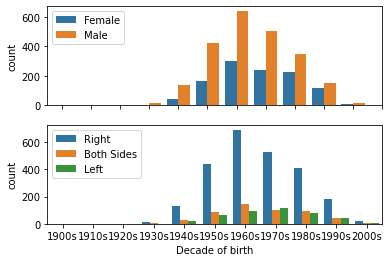

In [5]:
# rename column for legend
bl.rename(columns = {'5': 'Sex', '6':'Handedness'}, inplace = True)

fig, (ax1, ax2) = plt.subplots(2,1, sharex = True)
bins = np.arange(1900, 2020, 10)

# draw countplots
sns.countplot(x=pd.cut(bl['4'].dt.year, bins = bins), 
              hue="Sex", data=bl, ax = ax1)
sns.countplot(x=pd.cut(bl['4'].dt.year, bins = bins), 
              hue="Handedness", data=bl, ax = ax2)

# set xlabels
ax1.set(xticks=range(len(bins)), xticklabels=[str(i)+'s' for i in bins])
ax1.set_xlabel('')
ax2.set_xlabel('Decade of birth')

# set legends
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper left')

### Statistics for ages per Sex

In [7]:
filt_male = bl.Sex == 'Male'
bl[filt_male]['4'].dt.year.describe()

count    2267.000000
mean     1970.614027
std        14.930366
min      1901.000000
25%      1960.000000
50%      1969.000000
75%      1980.000000
max      2021.000000
Name: 4, dtype: float64

In [8]:
filt_female = bl.Sex == 'Female'
bl[filt_female]['4'].dt.year.describe()

count    1120.000000
mean     1973.639286
std        14.653528
min      1934.000000
25%      1963.000000
50%      1972.000000
75%      1985.000000
max      2020.000000
Name: 4, dtype: float64